# Практическая работа №2: Исследование задач о раскрасках

Выполнил студент группы 9304 Арутюнян Владимир, вариант 23

## Цель работы

Формирование представления о задачах о раскрасках, выработать умение использование леммы Бёрнсайда для решения задачи о раскрасках, привить навык использования систем компьютерной алгебры для реализации алгоритмов решения задачи.

## Основные теоретические положения

#### Действие группы на множество

Пусть $G$ - группа с нейтральным элементом $e$. $X$ - множество.

Говорят, что $G$ действует на $X$, если задана следующая операция
<center>$G\times X \rightarrow X$, обозначаемая $gx$, где $x\in X$, $g \in G$,</center> 
которая имеет свойства:

1. $\forall x \in X$,  $ex = x$
2. $\forall x \in X$, $\forall g \in G,\,h \in G$, $g(hx) = (gh)x$


#### Орбита 

Орбитой элемента $x \in X$ под действием группы $G$ называется множество $Gx = \left\{gx \;|\; g \in G\right\}$. А длиной орбиты - количество элементов в данной орбите.

#### Неподвижные точки

Неподвижными точками элемента $g \in G$ называется $X^g$ множество $x \in X$, таких что $gx = x$.


#### Лемма Бёрнсайда
 
 Теорема:$\;$Количество орбит действия группы $G$ на множество $X$ равно: 
 <center> $ N = \dfrac{1}{|G|}\sum\limits_{g \in G} |X^g| $ </center>
 
#### Постановка задачи о раскрасках
 
 Пусть $I$ - произвольное множество, $С$ - множество цветов.
 
 Раскраской множества $I$ называеся функция $I \rightarrow C$
 
 $C^I$ - множество всех раскрасок. Количество раскрасок можно выразить так $|C^I| = |C|^{|I|}$

Пусть группа  G  действует на множество  I, тогда формула
<center>$gf(i)=f(g^{−1}(i)),g \in G,i \in I,f \in C^I$</center>

задаёт действие $G$ на множество  $C^I$.

Для элемента $g \in G$ и функции $f \in C^I$ следующие условия эквивалентны:

1. $gf = f$

2. $f(i) = f(g^{n}i)$, $\forall i \in I $ и $n \in \mathbb{Z}$

3. Если $i,j \in I$ лежат в одном цикле в циклической записи перестановки $\varphi(g)$, то $f(i) = f(j)$

Количество раскрасок из множетсва $C^I$, которые сохраняют данный элемент $g \in G$ равно $|C|^{c(\phi(g))}$, $c(\phi(g))$ - число независимых циклов циклической записи данной перестановки $\phi(g)$

## Постановка задачи

Аналитически решить задачу о раскрасках; графически отобразить решения задачи с использованием системы компьютерной алгебры SageMath. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы

1. Аналитически решить задачу о раскрасках для заданного варианта. Все умозаключения в ходе решения обосновать и содержательно проинтерпретировать.
2. Реализовать средствами SageMath функцию, отображающую графически раскраску по заданному номеру. Продемонстрировать работу функции на нескольких примерах. Сделать выводы.
3. Дополнительное необязательное задание: для заданного варианта решить задачу в общем виде.

## Выполнение работы

### Задание.

Кадая сторона квадрата разбита на 7 равных частей и через точки деления проведены отрезки, параллельные сторонам квадрата. В получившиеся клеточки вставляют цветные стекла 5 различных цветов. Сколькими способами можно составить такую мозайку (с точностью до поворотов и осевых симметрий квадрата)?


### Решение


Пусть $C$ - это множество цветов, тогда мощность множества цветов $|C| = 5$ в данном условии.

$X$ - множество клеток в данном разбиении, тогда мощность множества клеток $|X| = 7 \times 7 = 49$

$G$ - группа преобразованй множества.


Для простоты обозначения преобразований пронумеруем ячейки мозайки.

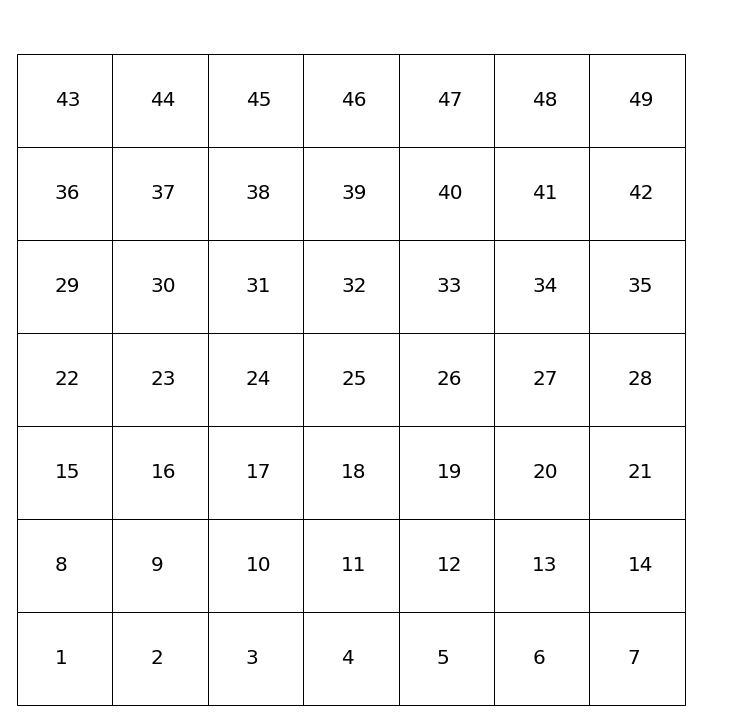

In [193]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

figure, axes = plt.subplots()
axes.plot(7, 7)
xlim_, ylim_ = -0.1, 7.5
axes.set(xlim=(xlim_, ylim_), ylim=(xlim_, ylim_))

sizeOfCell = 1
x = y = 0

for i in range(49):
    axes.add_patch(Rectangle((x, y), sizeOfCell, sizeOfCell, edgecolor='black',fill=False))
    axes.text(x + (sizeOfCell / 2.5), y + (sizeOfCell / 2.3), i + 1, fontsize=20)
    x += sizeOfCell
    if not (x % 7):
        x = 0
        y += sizeOfCell
        
inch = 13
figure.set_size_inches(inch, inch, forward=True)
plt.axis('off')
plt.grid(b=None)
plt.show()

Рассмотрим следующие преобразования:

$e$ - тождественное преобразование;

$\tau$ - поворот на 90 градусов по часовой стрелке. $\tau^4 = e$;

$\sigma$ - симметрия относительно вертикальной оси. $\sigma^2 = e$;

Запишем все возможные преобразования:

$e = (1)(2)(3)\dots(47)(48)(49)$ - каждая ячейка переходит в себя, поэтому количество независимых циклов равно количеству клеток $|X^e| = 49$.

$\tau = (1\;7\;49\;43)(2\;36\;48\;14)\dots(24\;32\;26\;18)(25)$ - четыре ячейки циклически переходят друг в друга, а ячейка под номером 25 переходит в саму себя, поэтому число независимых циклов - $|x^\tau| = \dfrac{49 - 1}{4} + 1 = 13$.

$\tau^2 = (1\;49)(2\;48)\dots(25)$ - каждая ячейка переходит в симметричную ей относительно центра, а ячейка под номером 25 остается на месте, поэтому число независимых циклов - $|x^{\tau^2}| = \dfrac{49 - 1}{2} + 1 = 25$.

$\tau^3 = (1\;43\;49\;7)(2\;14\;48\;36)\dots(24\;18\;26\;32)(25)$ - четыре ячейки циклически переходят друг в друга, а ячейка под номером 25 переходит в саму себя, поэтому число независимых циклов - $|x^{\tau^3}| = \dfrac{49 - 1}{4} + 1 = 13$.

$\sigma = (1\;7)(2\;6)(3\;5)(4)\dots(45\;47)(46)$ - все ячейки переходят в симметричные им относительно средней вертикальной колонки, а ячейки в средней колонке остаются на месте (симметрия относительно вертикали), поэтому число независимых циклов - $|x^{\sigma}| = \dfrac{49 - 7}{2} + 7 = 28$.

$\sigma\tau^2 = (1\;43)(2\;44)(3\;45)\dots(26)(27)(28)$ - все ячейки переходят в симметричные им относительно средней горизонтальной строки, а ячейки в средней строке остаются на месте (симметрия относительно горизонтали), поэтому число независимых циклов - $|x^{\sigma\tau^2}| = \dfrac{49 - 7}{2} + 7 = 28$.

$\sigma\tau = (1)(2\;8)\dots(42\;48)(49)$ - все ячейки на побочной диагонали остаются на месте, а остальные переходят в симметричные относительно побочной диагонали (симметрия относительно побочной диагонали), поэтому количество независимых циклов - $|x^{\sigma\tau}| = \dfrac{49 - 7}{2} + 7 = 28$.

$\sigma\tau^3 = (1\;49)(2\;42)(3\;35)(4\;28)(5\;21)(6\;14)(7)\dots(43)$ - все ячейки на главной диагонали остаются на месте, а остальные переходят в симметричные относительно главной диагонали (симметрия относительно главной диагонали), поэтому количество независимых циклов - $|x^{\sigma\tau^3}| = \dfrac{49 - 7}{2} + 7 = 28$.

Тогда количество всех преобразований:$\;|G| = 8$, $G = \{e, \tau, \tau^2, \tau^3, \sigma, \sigma\tau, \sigma\tau^2, \sigma\tau^3\}$.

По лемме Бёрнсайда найдем количество всевозможных раскрасок с точностью до поворотов куба:
<center>$N = \dfrac{1}{8}(5^{49} + 4 \cdot 5^{28} + 5^{25} + 2 \cdot 5^{13})$</center>

### Реализовать отображение раскраски куба по заданному номеру

__Функции генерации раскраски по числу и графического отображения раскраски.__

Введите номер раскраски: 123456789


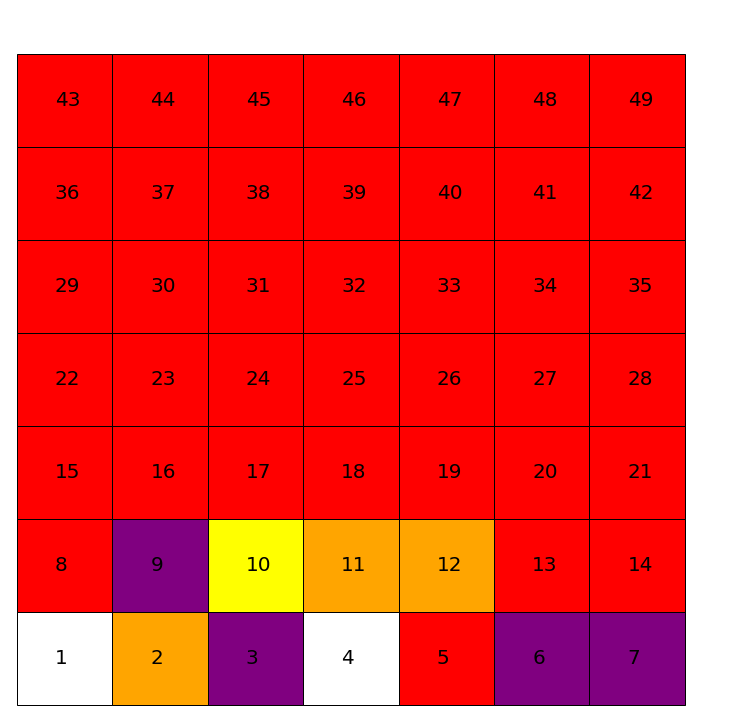

In [194]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


def createSquare(n):
    rectangles = []
    text = []
    sizeOfCell = 1
    x = y = 0
    for i  in range(sizeOfSquare):
        color = n % 5
        n = n // 5
        rectangles.append([x, y, sizeOfCell, colors[color]])
        text.append([x + (sizeOfCell / 2.5), y + (sizeOfCell / 2.3), i + 1])
        x += sizeOfCell
        if not x % 7:
            x = 0
            y += sizeOfCell
    return [rectangles, text]


def printSquare(rectangles, text):
    figure, axes = plt.subplots()
    axes.plot(7, 7)
    xlim_, ylim_ = -0.1, 7.5
    axes.set(xlim=(xlim_, ylim_), ylim=(xlim_, ylim_))

    sizeOfCell = 1

    for i in range(49):
        axes.add_patch(Rectangle((rectangles[i][0], rectangles[i][1]), rectangles[i][2], rectangles[i][2], facecolor=rectangles[i][3], edgecolor='black'))
        axes.text(text[i][0], text[i][1], text[i][2], fontsize=20)
                
    inch = 13
    figure.set_size_inches(inch, inch, forward=True)
    plt.axis('off')
    plt.grid(b=None)
    plt.show()
    

n = int(input('Введите номер раскраски: '))
colors = ['red', 'purple', 'orange', 'yellow', 'white']
sizeOfSquare = 49
a = createSquare(n)
printSquare(a[0], a[1])

__Функции поворота на 90 градусов по часовой стрелке и симметрии относительно вертикальной оси.__

In [195]:
def verticalRefraction(rectangles, text):
    half = int(sqrt(len(rectangles)))
    for i in range(0, len(rectangles) - 1, 7):
        for j in range(half // 2):
            index_ = half - 1 - j + i
            text[j + i][2], text[index_][2] = text[index_][2], text[j + i][2]
            rectangles[j + i][3], rectangles[index_][3] = rectangles[index_][3], rectangles[j + i][3]
    return [rectangles, text]

In [196]:
def rotate90Clockwise(rectangles, text):
    j, offset, summand1, leftBorder, summand2, multiplier = 6, 5, 6, 0, 3, 1
    leng = int(sqrt(len(rectangles)) - 1)
    while j != (len(rectangles) - 1) // 2:
        for i in range(leftBorder, leng):
            index_j = len(rectangles) - 1 - j
            index_i = len(rectangles) - 1 - i
            rectangles[index_j][3], rectangles[index_i][3], rectangles[j][3], rectangles[i][3] = rectangles[i][3], rectangles[index_j][3], rectangles[index_i][3], rectangles[j][3]
            text[index_j][2], text[index_i][2], text[j][2], text[i][2] = text[i][2], text[index_j][2], text[index_i][2], text[j][2]
            j += 7
            if i % 7 == offset:
                offset -= 1 
                leng += summand1
                leftBorder = i + summand2
                multiplier += 1
                summand2 += 2
                j = int(sqrt(len(rectangles)) - 1) * multiplier
    return [rectangles, text]

Введите номер раскраски: 123456789
Симметрия относительно побочной диагонали:


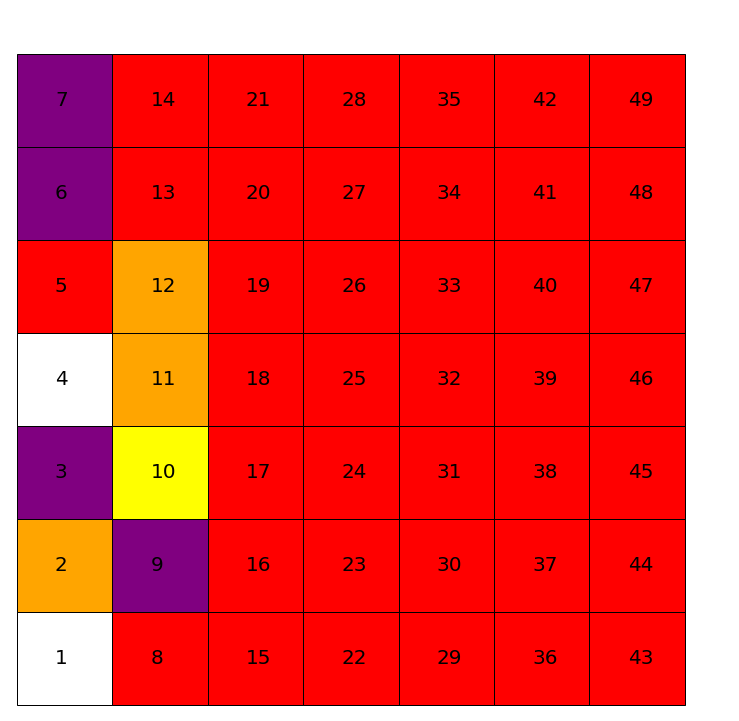

Симметрия относительно горизонтали:


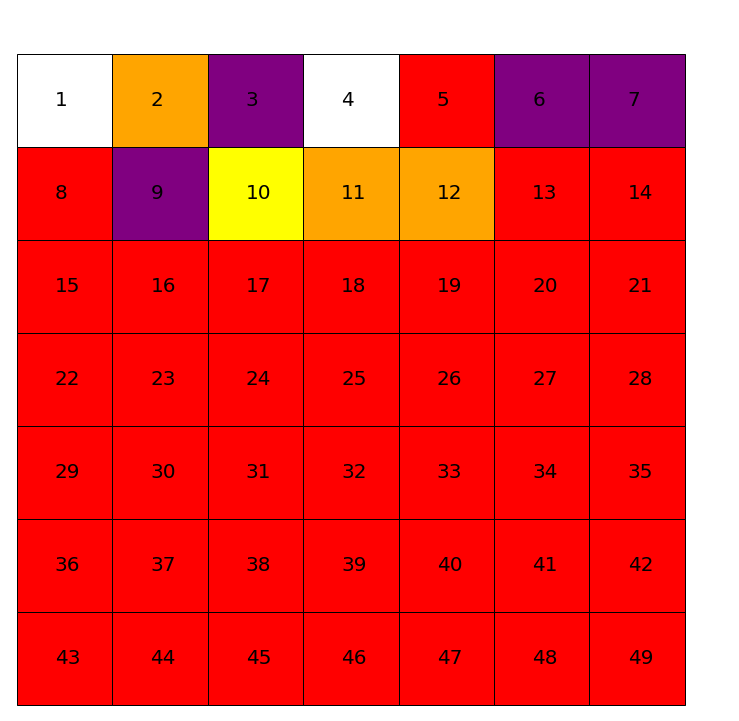

Симметрия относительно главной диагонали:


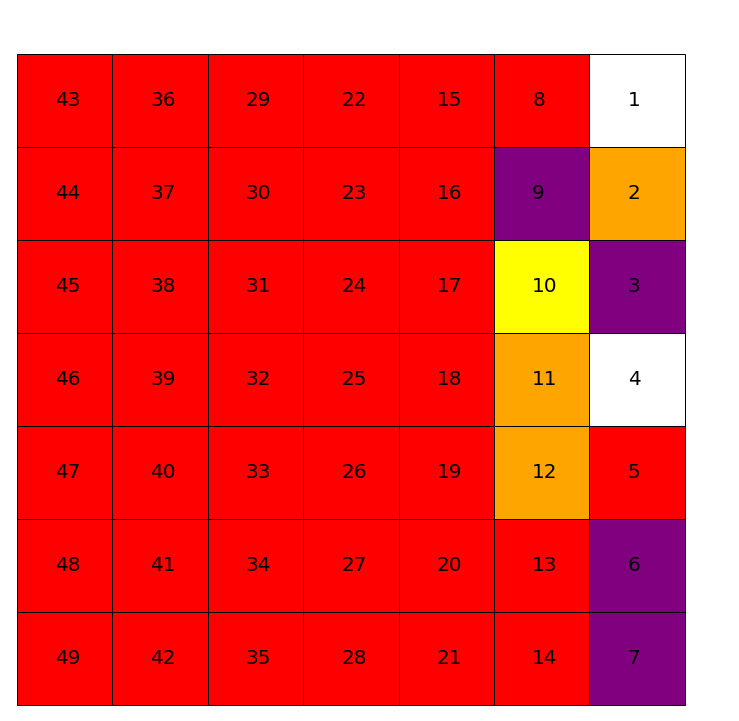

Симметрия относительно вертикали:


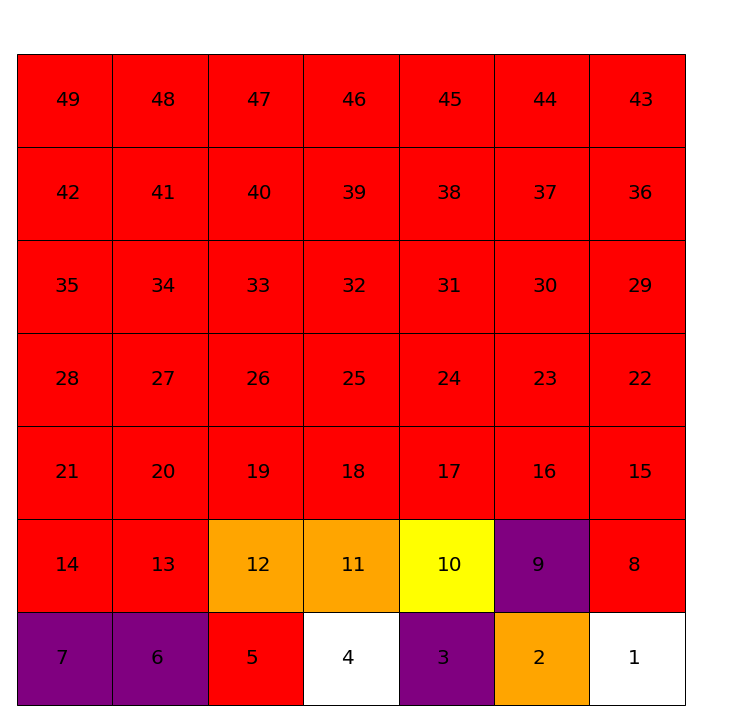

Поворот на 90 градусов по часовой стрелке:


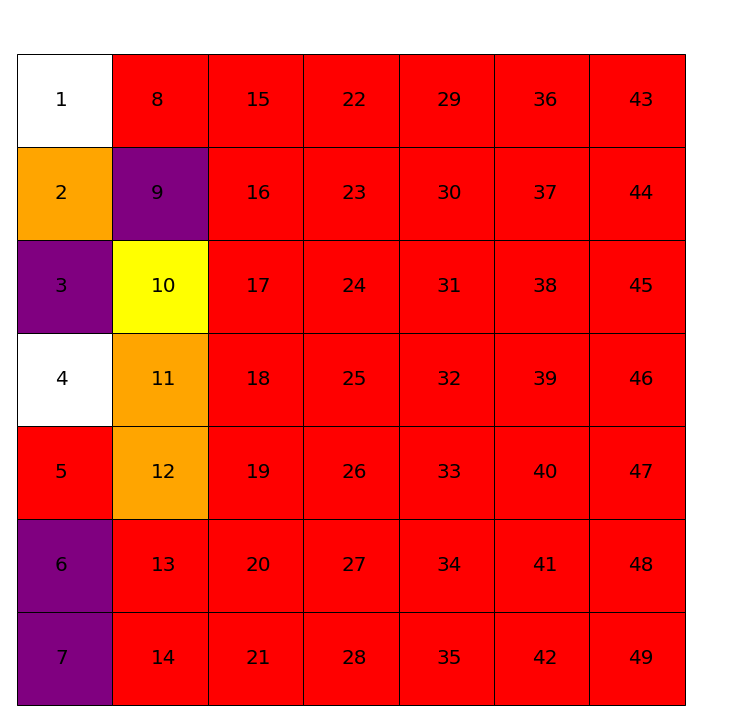

Поворот на 180 градусов по часовой стрелке:


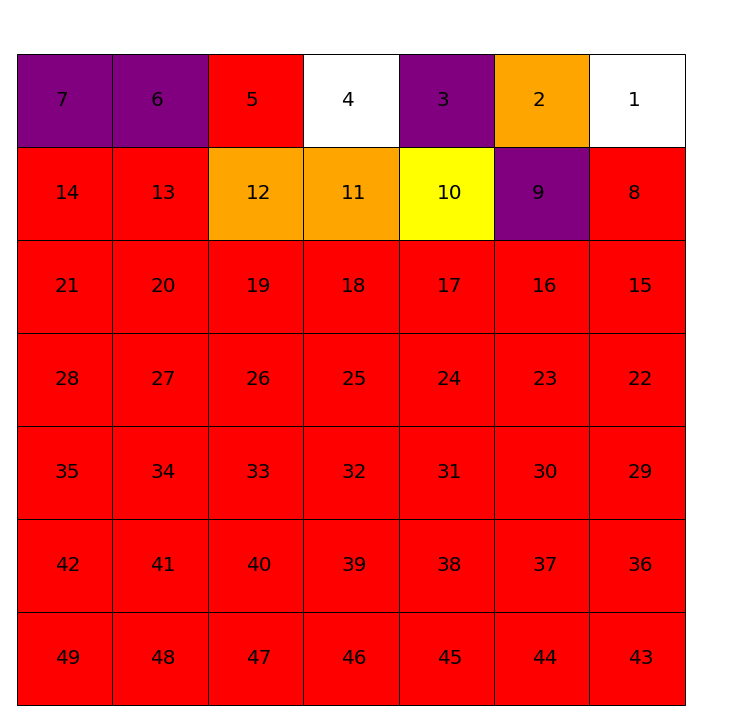

Поворот на 270 градусов по часовой стрелке:


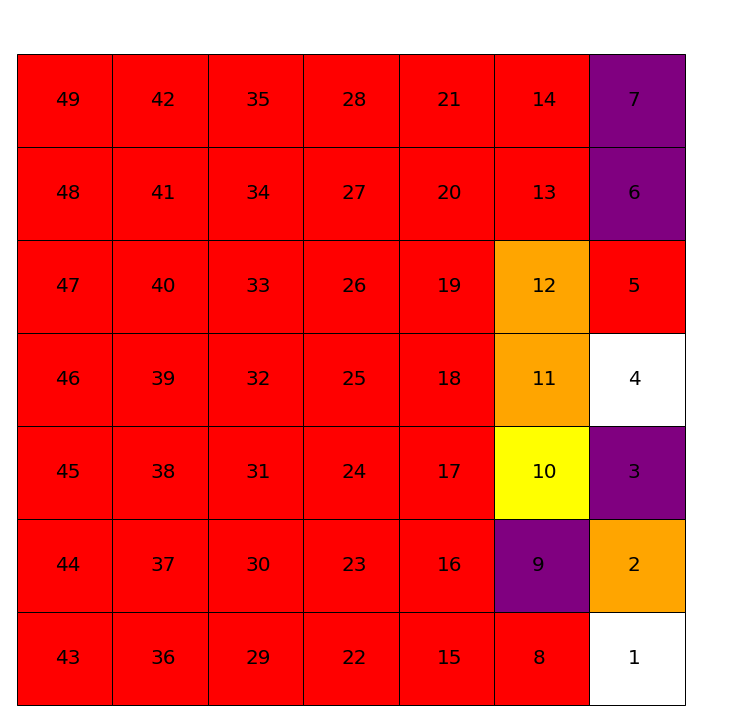

Тождественное преобразование:


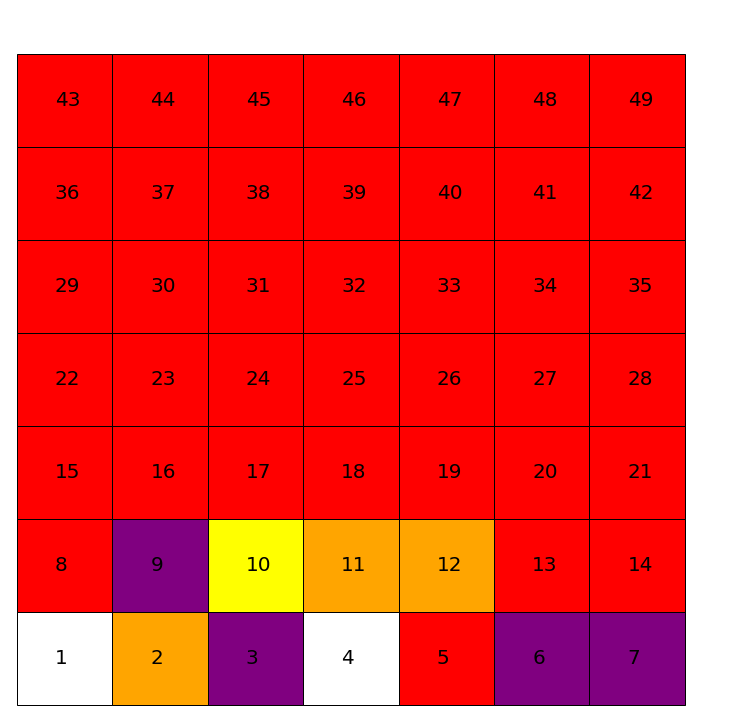

In [197]:
n = int(input('Введите номер раскраски: '))
rectangles, text = createSquare(n)

print('Симметрия относительно побочной диагонали:')
rectangles, text  = verticalRefraction(rectangles, text)
rectangles, text  = rotate90Clockwise(rectangles, text)
printSquare(rectangles, text)

print('Симметрия относительно горизонтали:')
rectangles, text  = rotate90Clockwise(rectangles, text)
printSquare(rectangles, text)

print('Симметрия относительно главной диагонали:')
rectangles, text  = rotate90Clockwise(rectangles, text)
printSquare(rectangles, text)

rectangles, text = createSquare(n)

print('Симметрия относительно вертикали:')
rectangles, text  = verticalRefraction(rectangles, text)
printSquare(rectangles, text)

rectangles, text = createSquare(n)

print('Поворот на 90 градусов по часовой стрелке:')
rectangles, text  = rotate90Clockwise(rectangles, text)
printSquare(rectangles, text)

print('Поворот на 180 градусов по часовой стрелке:')
rectangles, text  = rotate90Clockwise(rectangles, text)
printSquare(rectangles, text)

print('Поворот на 270 градусов по часовой стрелке:')
rectangles, text  = rotate90Clockwise(rectangles, text)
printSquare(rectangles, text)

print('Тождественное преобразование:')
rectangles, text  = rotate90Clockwise(rectangles, text)
printSquare(rectangles, text)

___Вывод:___ При помощи средств SageMath были реализованы функции, отображающие графически раскраску мозайки.

### Решение задачи в общем виде

Пусть $X$ - множество ячеек при разбиении, $|X| = n^2$, $С$ - множество цветов. $|C| = m$

$G$ - группа преобразований множества. Количество всех возможных пребразований: $|G| = 8$.

Если $n\;mod\;2 = 1$:

Центральная ячейка при любых преобразованиях остается на месте. 

При повороте на 90 или 270 градусов 4 ячейки циклически переходят друг в друга, а центральная не двигается. Тогда количество циклов в $\tau$ и $\tau^3$ равно $\frac{n^2-1}{4} + 1$.

При повороте на $180$ градусов 2 ячейки циклически переходят друг в друга, а центральная не двигается. Тогда количество циклов в $\tau^2$ равно $\frac{n^2-1}{2} + 1$.

При всех симметриях $n$ элементов останутся на местах. А остальные ячейки циклически переходят в свою пару по симметрии. Тогда количество циклов во всех симметриях равно $\frac{n^2-n}{2}+n$.

1. $|X^{e}| = m^{n^2}$

2. $|X^{\tau}| = m^{\frac{n^2-1}{4} + 1}$

3. $|X^{\tau^2}| = m^{\frac{n^2-1}{2} + 1}$

4. $|X^{\tau^3}| = m^{\frac{n^2-1}{4} + 1}$

5. $|X^{\sigma}| = m^{\frac{n^2-n}{2}+n}$

6. $|X^{\sigma\tau}| = m^{\frac{n^2-n}{2}+n}$

7. $|X^{\sigma\tau^2}| = m^{\frac{n^2-n}{2}+n}$

8. $|X^{\sigma\tau^3}| = m^{\frac{n^2-n}{2}+n}$



По теореме Бёрнсайда:$$
N = \frac{1}{|G|}\sum_{g \in G} |X^g| = \frac{1}{8}(m^{n^2}+m^{\frac{n^2-1}{2} + 1}+ 2 \cdot m^{\frac{n^2-1}{4} + 1}+4 \cdot m^{\frac{n^2-n}{2}+n})
$$

Если $n\;mod\;2 = 0$:

При повороте на 90 или 270 градусов 4 ячейки циклически переходят друг в друга. Тогда количество циклов в $\tau$ и $\tau^3$ равно $\frac{n^2}{4}$.

При повороте на $180$ градусов 2 ячейки циклически переходят друг в друга. Тогда количество циклов в $\tau^2$ равно $\frac{n^2}{2}$.

При симметриях относительно диагоналей $n$ элементов останутся на местах. А остальные ячейки циклически переходят в свою пару по симметрии. Тогда количество циклов во них равно $\frac{n^2-n}{2}+n$.

При симметриях относительно горизонтали или вертикали ячейки циклически переходят в свою пару по симметрии. Тогда количество циклов во них равно $\frac{n^2}{2}$.


1. $|X^{e}| = m^{n^2}$

2. $|X^{\tau}| = m^{\frac{n^2}{4}}$

3. $|X^{\tau^2}| = m^{\frac{n^2}{2}}$

4. $|X^{\tau^3}| = m^{\frac{n^2}{4}}$

5. $|X^{\sigma}| = m^{\frac{n^2}{2}}$

6. $|X^{\sigma\tau}| = m^{\frac{n^2-n}{2}+n}$

7. $|X^{\sigma\tau^2}| = m^{\frac{n^2}{2}}$

8. $|X^{\sigma\tau^3}| = m^{\frac{n^2-n}{2}+n}$



По теореме Бёрнсайда:$$
N = \frac{1}{|G|}\sum_{g \in G} |X^g| = \frac{1}{8}(m^{n^2}+ 3 \cdot m^{\frac{n^2}{2}}+ 2 \cdot m^{\frac{n^2}{4}}+ 2 \cdot m^{\frac{n^2-n}{2}+n})
$$

## Вывод

В ходе выполнения практической работы было сформировано представление о задачах о раскрасках, применена на практике лемма Бёрнсайда для решения задачи о раскасках, использованы системы компьютерной алгебры для реализации алгоритмов.

Были реализованы функции для графического отображения раскрасок мозаики.